# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score, roc_curve,auc

# Importing Dataset

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Encoding Categorical Values

In [4]:
categorical_column = ['Attrition', 'BusinessTravel', 'Department','Gender', 'JobRole', 'MaritalStatus', 'OverTime','EducationField']
encoder=LabelEncoder()
df[categorical_column]=df[categorical_column].apply(encoder.fit_transform)

# Seperating into X and y

In [5]:
y=df['Attrition']
X=df.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'],axis=1)

# Spliting into Train and Test Sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Feature Scaling

Standardization

In [7]:
standard_scaler = StandardScaler()

X_train_standardized = standard_scaler.fit_transform(X_train)
X_test_standardized = standard_scaler.transform(X_test)

X_standardized = standard_scaler.fit_transform(X)

Normalization

In [8]:
min_max_scaler = MinMaxScaler()

X_train_normalized = min_max_scaler.fit_transform(X_train)
X_test_normalized = min_max_scaler.transform(X_test)

X_normalized = min_max_scaler.fit_transform(X)

# Hyperparameter tuning using GridSearchCV

In [9]:
def tune_hyperparameters(model,X,y):
  param_grid = {
      'n_neighbors' : np.arange(5,20,2),
      'leaf_size' : np.arange(1,50,5),
      'weights' : ['uniform','distance']
  }
  grid_search = GridSearchCV(model,param_grid=param_grid)
  grid_search.fit(X,y)
  print("Best Params: ",grid_search.best_params_)
  return grid_search.best_params_

# Without Scaling

In [10]:
best_parameters_raw = tune_hyperparameters(KNeighborsClassifier(),X_train,y_train)

Best Params:  {'leaf_size': 1, 'n_neighbors': 15, 'weights': 'distance'}


### With Standardization

In [11]:
best_parameters_std = tune_hyperparameters(KNeighborsClassifier(),X_train_standardized,y_train)

Best Params:  {'leaf_size': 1, 'n_neighbors': 11, 'weights': 'uniform'}


### With Normalization

In [12]:
best_parameters_norm = tune_hyperparameters(KNeighborsClassifier(),X_train_normalized,y_train)

Best Params:  {'leaf_size': 1, 'n_neighbors': 9, 'weights': 'uniform'}


# KNeighbors Classifier

In [13]:
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred))
  print("Recall: ",recall_score(y_test,y_pred))
  print("F1 Score: ",f1_score(y_test,y_pred))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

  
  fpr,tpr,thresholds = roc_curve(y_test,y_pred)
  plt.plot(fpr, tpr,color='green',label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
  plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend(loc="lower right")
  plt.show()

### Without Scaling

Accuracy:  0.8253968253968254
Precision:  0.5
Recall:  0.03896103896103896
F1 Score:  0.07228915662650602
Confusion Matrix:
 [[361   3]
 [ 74   3]]


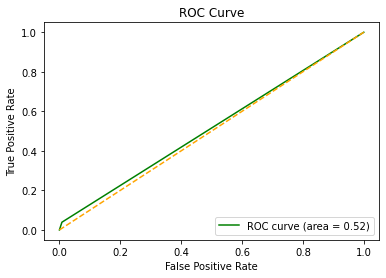

In [14]:
train_predict_evaluate(KNeighborsClassifier(**best_parameters_raw),X_train,y_train,X_test)

### With Standardization

Accuracy:  0.8231292517006803
Precision:  0.4
Recall:  0.025974025974025976
F1 Score:  0.04878048780487805
Confusion Matrix:
 [[361   3]
 [ 75   2]]


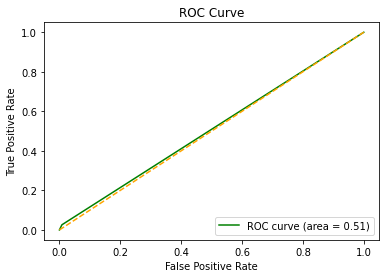

In [15]:
train_predict_evaluate(KNeighborsClassifier(**best_parameters_std),X_train_standardized,y_train,X_test_standardized)

### With Normalization

Accuracy:  0.8321995464852607
Precision:  0.7142857142857143
Recall:  0.06493506493506493
F1 Score:  0.11904761904761903
Confusion Matrix:
 [[362   2]
 [ 72   5]]


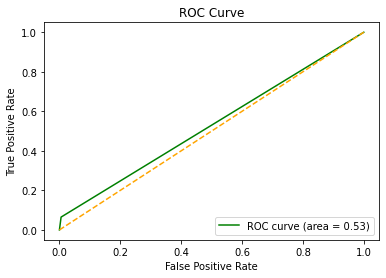

In [16]:
train_predict_evaluate(KNeighborsClassifier(**best_parameters_norm),X_train_normalized,y_train,X_test_normalized)

# K-Fold Cross Validation

In [17]:
def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))

  metrics = []
  metrics.append(np.mean(scores['test_accuracy']))
  metrics.append(np.mean(scores['test_precision']))
  metrics.append(np.mean(scores['test_recall']))
  metrics.append(np.mean(scores['test_f1']))

  print("Accuracy: ",metrics[0])
  print("Precision: ",metrics[1])
  print("Recall: ",metrics[2])
  print("F1 Score: ",metrics[3])

  return metrics

In [18]:
metrics = []

### Without Scaling

In [19]:
metrics.append(cross_validation(KNeighborsClassifier(**best_parameters_raw),X,y))

Accuracy:  0.8414965986394558
Precision:  0.58
Recall:  0.0673758865248227
F1 Score:  0.12029856935517311


### With Standardization

In [20]:
metrics.append(cross_validation(KNeighborsClassifier(**best_parameters_std),X_standardized,y))

Accuracy:  0.845578231292517
Precision:  0.85
Recall:  0.059308510638297875
F1 Score:  0.10751077493934638


In [21]:
metrics.append(cross_validation(KNeighborsClassifier(**best_parameters_norm),X_normalized,y))

Accuracy:  0.8482993197278912
Precision:  0.7714285714285715
Recall:  0.08882978723404253
F1 Score:  0.15736185383244206


# Performance and Comparison Plots

In [22]:
mdf = pd.DataFrame(metrics,columns=["Accuracy","Precision","Recall","F1 Score"],index=["Without Scaling","With Standardization","With Normalization"])
mdf.head()

,Accuracy,Precision,Recall,F1 Score
Without Scaling,0.841497,0.580000,0.067376,0.120299
With Standardization,0.845578,0.850000,0.059309,0.107511
With Normalization,0.848299,0.771429,0.088830,0.157362


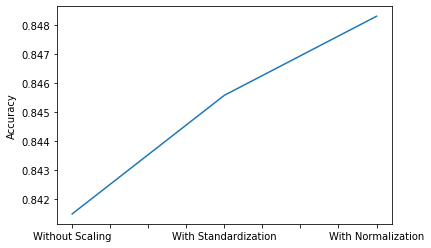

In [23]:
mdf['Accuracy'].plot()
plt.ylabel("Accuracy")
plt.show()

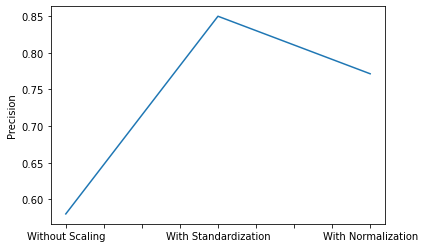

In [24]:
mdf['Precision'].plot()
plt.ylabel("Precision")
plt.show()

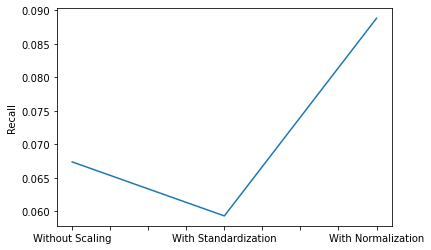

In [25]:
mdf['Recall'].plot()
plt.ylabel("Recall")
plt.show()

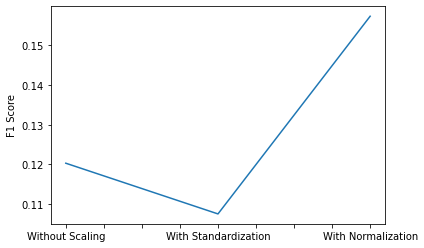

In [26]:
mdf['F1 Score'].plot()
plt.ylabel("F1 Score")
plt.show()